 ## Proyecto de presentacion de Inteligencia Artificial

<u>Nombre del Estudiante </u> :  José Araya Prohens     

<u>Rut </u> :  20.444.205 - 3

## Recomendaciones de animes de la plataforma de streaming crunchyroll

<u>**Mi csv**</u>:      
 Es un dataset de los shows disponibles en la plataforma de streaming de pago llamado crunchyroll , este dataset posee más de 1000 filas de datos , estos datos fueron adqueridos del servicio en mayo 2022 de Estados Unidos       [enlace de Kaggle](https://www.kaggle.com/datasets/victorsoeiro/crunchyroll-animes-and-movies?select=titles.csv)     

<u>**Mi propuesta**</u>:    
Analizar los datos de manera que puedas predecir un tiulo recomendado a partir de un genero que te gusta o un titulo que ya viste.  

<u>**Modelo que se piensa implementar**</u>     
 Arboles de Decision   
    
<u>**Objetivo** </u> :           


<u>**Referencias Bibliograficas** </u> :        
Sistema de recomendaciones en base de arbol de decision [enlace](https://cs.emis.de/LNI/Proceedings/Proceedings165/170.pdf)

### Imports

In [391]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from rich import print
from rich import pretty
%load_ext rich

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


### Instrucciones del profesor
Estimado alumnos:

Este es un recordatorio para el trabajo de presentacion.

CONDICIONES:
Basado en la busqueda personal anunciada en clases de un dataset a su interes. Debe generar un estudio sobre dicho
dataset. El estudio es de caracter indagatorio, en el cual se evaluaran las siguientes cosas:

1. Uso y manejo de las herramientas de manipulacion de datos (DataFrame) (10%)
2. Propuesta y desarrollo de indicadores estadisticos con algun fin que estime pertinente (20%)
3. Muestra de graficos (con matplotlib BIEN HECHOS) , con el fin de plantear alguna problematica/propuesta u otro, el cual le parece adecuado mostrar. (30%)
4. Uso de algun modelo predictivo aprendido durante el curos, sea, KMeans, algun regresor linea o arboles (otros modelos que usted estudie, son permitidos)(30%)
5. Muestra de resultados, y analisis del modelo encontrando, con foco en su precision predictiva y overfit (si applica) (10%)
NOTA:
Recuerde que puede usar cualquer recurso mostrado en el curso, si usa otro modelo, debe explicar el nuevo modelo. Si
considera necesario usar PCA, HAGALO!

El Profe!

In [392]:
titulos = pd.read_csv("csv/titles.csv")
creditos = pd.read_csv("csv/credits.csv")

primero vamos a definir que variables importan para este trabajo

In [424]:
titulos = titulos[['title','type','description','release_year','age_certification','runtime','genres','seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']]
titulos['genres'] = titulos['genres'].str.replace('[','',regex=True).replace(']','',regex=True).replace("'",'',regex=True)
titulos['title'] = titulos['title'].str.capitalize()
titulos.head()

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Lupin the third,SHOW,Arsene Lupin III is the grandson of the master...,1971,TV-14,23,"scifi, animation, action, comedy, crime",6.0,7.9,2116.0,45.829,8.0
1,Mobile suit gundam,SHOW,Mobile Suit Gundam is a televised anime series...,1979,TV-Y7,25,"scifi, war, animation, action, drama, fantasy",1.0,7.9,2281.0,41.250,8.1
2,Galaxy express 999,SHOW,Galaxy Express 999 is a manga written and draw...,1978,TV-PG,24,"scifi, action, drama, animation",1.0,7.8,459.0,5.064,8.3
3,Lupin the 3rd,SHOW,The master thief Lupin III and his cronies con...,1977,TV-14,24,"scifi, animation, action, comedy, crime, fantasy",4.0,8.0,1738.0,0.600,NaN
4,Chōdenji machine voltes v,SHOW,Chōdenji Machine Voltes V is a Japanese anime ...,1977,TV-PG,24,"drama, action, scifi, animation",1.0,8.1,207.0,12.625,7.3


In [394]:
titulos.shape

(1081, 12)

tenemos 1081 filas de datos 

In [395]:
unique_genres = [val.strip() for sublist in titulos.genres.dropna().str.split(",").tolist() for val in sublist]

In [396]:
genres_summary = pd.DataFrame(unique_genres,columns=['genres']).value_counts().reset_index().rename(columns={0:'count'})
#Eliminamos la categoria animacion y la categoria vacia ya que estas no son importantes a la hora de graficarlo
genres_summary = genres_summary.drop(0) 
genres_summary = genres_summary.drop(15) 

In [397]:
genres_summary

,genres,count
1,comedy,567
2,scifi,472
3,action,463
4,drama,395
5,fantasy,353
6,romance,253
7,thriller,90
8,sport,55
9,horror,49
10,family,35


grafica de la cantidad de animes que tiene cada genero en la plataforma de crunchyroll

<AxesSubplot:xlabel='count', ylabel='genres'>

<Figure size 640x480 with 1 Axes>

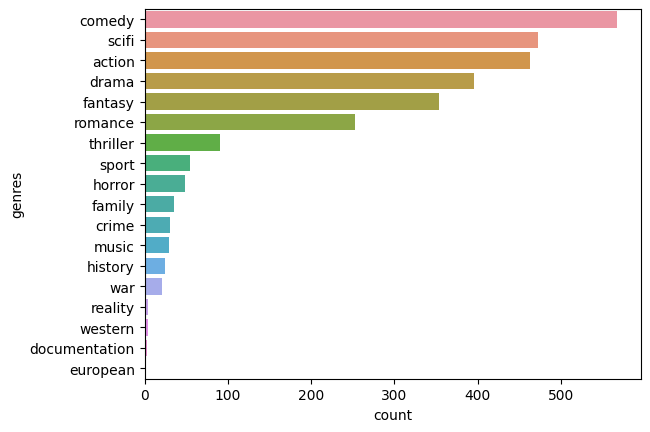

In [398]:
ax = sns.barplot(x="count", y="genres", data=genres_summary)
ax


Ahora se podria clasificar los animes de la misma forma pero segun el año que se esteno la produccion por primera vez

In [399]:
releaseYearSum = pd.DataFrame(titulos,columns=['release_year']).value_counts().reset_index().rename(columns={0:'count'} )
releaseYearSum  = releaseYearSum.sort_values(by = 'release_year' , ascending=False).reset_index()
releaseYearSum = releaseYearSum.drop(columns=['index'])


<AxesSubplot:xlabel='release_year', ylabel='count'>

<Figure size 640x480 with 1 Axes>

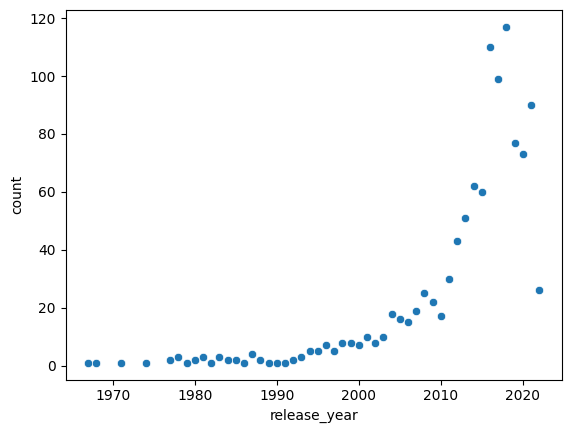

In [400]:
sns.scatterplot(x='release_year',y ='count', data=releaseYearSum)

In [425]:
titulos.sort_values(by='imdb_score', ascending = False).dropna()

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
83,Fullmetal alchemist: brotherhood,SHOW,Edward and Alphonse Elric's reckless disregard...,2009,TV-14,29,"scifi, action, animation, comedy, drama, fantasy",1.0,9.1,156503.0,110.534,8.7
243,Hunter x hunter,SHOW,Twelve-year-old Gon Freecss one day discovers ...,2011,TV-14,23,"drama, action, comedy, crime, animation, docum...",3.0,9.0,87857.0,117.924,8.8
965,Spy x family,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.380,8.8
316,Attack on titan,SHOW,"Several hundred years ago, humans were nearly ...",2013,TV-MA,24,"scifi, action, drama, fantasy, horror, animation",4.0,9.0,325381.0,139.388,8.6
85,Death note,SHOW,Light Yagami is an ace student with great pros...,2006,TV-14,24,"scifi, animation, crime, drama, fantasy, thriller",1.0,9.0,302147.0,104.037,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
589,Rainy cocoa,SHOW,Aoi’s soaked by a sudden rainstorm and takes s...,2015,TV-PG,2,"animation, comedy",5.0,3.6,60.0,4.467,4.8
743,Tsukipro the animation,SHOW,"SOARA, Growth, SolidS, and QUELL are four grou...",2017,TV-PG,24,"comedy, animation, music",2.0,3.4,11.0,6.920,9.0
763,Hand shakers,SHOW,"Tazuna is a high school student, living in Osa...",2017,TV-14,23,"action, scifi, animation",1.0,3.1,185.0,13.014,5.6
1060,Ex-arm,SHOW,2014: Akira Natsume seems to almost have a pho...,2021,TV-14,23,"scifi, animation, action, crime, romance",1.0,1.7,750.0,16.550,5.8


### Filtros para los generos

Para poder filtrar facilmente los titulos se crearon estas dos funciones 
1. multicontainsFun para poder filtrar en titulos que tengan varios generos solo si tambien contiene el buscado

2. solocontainsFun para poder filtrar en titulos que solo tengan el genero que se busca

In [420]:
#Para filtrar
def multicontainsFun(tipoStr = "" , data = pd.DataFrame , column = 'genres'):
   return data[data[column].str.contains(tipoStr)]

def solocontainsFun(tipoStr = "" , data = pd.DataFrame , column = 'genres'):
   return data[data[column] == tipoStr]



In [427]:
#Para buscar un titulo
def buscarTitulo(titulo = "Gintama"):
    funtitle = titulos['title'].str.contains(titulo)
    return titulos[funtitle]

In [404]:
multicontainsFun(tipoStr='action',data=titulos , column='genres').sort_values(by="tmdb_popularity" ,ascending = False)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
965,SPY x FAMILY,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.380,8.8
432,Dragon Ball Super,SHOW,"With Majin Boo defeated half-a-year prior, pea...",2015,TV-14,23,"action, scifi, comedy, animation, thriller, dr...",5.0,8.4,28567.0,423.650,8.2
12,Dragon Ball Z,SHOW,Dragon Ball Z is a Japanese animated televisio...,1989,TV-PG,24,"scifi, action, animation, comedy, fantasy, thr...",16.0,8.8,125554.0,389.990,8.2
86,Naruto,SHOW,"In another world, ninja are the ultimate power...",2002,TV-PG,23,"scifi, comedy, animation, action, fantasy, thr...",6.0,8.4,93980.0,362.730,8.4
84,Naruto Shippūden,SHOW,Naruto Shippuuden is the continuation of the o...,2007,TV-14,23,"scifi, action, animation, comedy, drama, fantasy",24.0,8.7,115863.0,350.688,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...
869,Akudama Drive,SHOW,"Long ago, a war broke out in Japan that pitted...",2020,TV-MA,23,"animation, action, scifi",1.0,7.4,1743.0,NaN,NaN
937,Gibiate,SHOW,"A disease called ""Gibia"" has infected the worl...",2020,NaN,23,"action, fantasy, animation",1.0,4.2,172.0,NaN,NaN
989,Mushoku Tensei: Jobless Reincarnation,SHOW,A 34-year-old Japanese NEET is run over by a s...,2021,TV-MA,23,"drama, fantasy, animation, action",1.0,8.4,8436.0,NaN,NaN
997,Rust-Eater Bisco,SHOW,In a world where mushrooms have decimated the ...,2022,TV-14,23,"scifi, animation, action, fantasy",1.0,7.0,581.0,NaN,NaN


In [443]:

buscarTitulo(titulo='Spy').iloc[0,2]

"Master spy Twilight is the best at what he does when it comes to going undercover on dangerous missions in the name of a better world. But when he receives the ultimate impossible assignment—get married and have a kid—he may finally be in over his head!\n\nNot one to depend on others, Twilight has his work cut out for him procuring both a wife and a child for his mission to infiltrate an elite private school. What he doesn't know is that the wife he's chosen is an assassin and the child he's adopted is a telepath!"

In [407]:
titulos[titulos['title'].str.contains('SPY')]

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
965,SPY x FAMILY,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.38,8.8


### Requerimientos para poder lograr el objetivo

1. Poder filtrar entre generos
2. Identificar y comparar con popularidad
3. filtrar por clasificacion de edad

### por ejemplo en un caso manual:

<u>Mi perfil </u>:
tengo 22 años

<u>Caso 1 </u>:
yo vi spy x familiy  y me gusto ->  
* genero = action , comedia , drama y thriller -> "Generos que me gustan porque la serie me gusta"
* tmdb_score = 8.8  -> "es una puntuacion alta"
* imdb_score = 9.0  -> "es una puntuacion alta"
* tmdb_popularity = 1200
* age_certification = TV-14 -> "recomendacion para 14 años o más"
* seasons = 1.0 -> "Solo tiene 1 temporada"
* runtime = 24 -> "solo tendra 24 episodios (actualmente)"

<u>Caso 2 </u>:
yo vi jujutsu kaisen  y me gusto ->  
* genero = scifi ,action , fantasy y thriller -> "Generos que me gustan porque la serie me gusta"
* tmdb_score = 8.5  -> "es una puntuacion alta"
* imdb_score = 8.6  -> "es una puntuacion alta"
* tmdb_popularity = 303
* age_certification = TV-MA -> "apta solo para mayores"
* seasons = 1.0 -> "Solo tiene 1 temporada"
* runtime = 24 -> "solo tendra 24 episodios (actualmente)"

<u>Caso 3 </u>:
yo vi gintama  y me gusto ->  
* genero = action ,comedy y scifi -> "Generos que me gustan porque la serie me gusta"
* tmdb_score = 7.9  -> "es el mas bajo de los tres casos pero mayor que 6.5"
* imdb_score = 8.7  -> "es una puntuacion alta"
* tmdb_popularity = 68.218
* age_certification = TV-14 -> "apta solo para mayores"
* seasons = 12.0 -> "Solo tiene 12 temporada"
* runtime = 24 -> "24 episodios por temporada "

<u>Diagrama de venn de los generos </u> :       

<img src="assets/diagramavennIA.jpg" style="width:50% ; position:relative ;">

1. la interseccion entre los tres es la accion.
2. los generos en comun entre "Spy x Family" y "Jujutsu Kaisen" es el genero de Thriller.
3. los generos en comun entre "Spy x Family" y "Gintama" es el genero de comedia.
4. los generos en comun entre "Jujustu Kaisen" y "Gintama" es el genero del Scifi o Ciencia ficcion.
5. el complemento de "Spy x Family" es genero de drama.
6. el complemento de "Jujustu Kaisen" es genero de fantasia.




                            